In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datashader.resampling import downsample_methods

In [3]:
from tensorflow.keras.datasets import cifar10

(x_train_10, y_train_10), (x_test_10, y_test_10) = cifar10.load_data()

x_train_10 = x_train_10.astype("float32") / 255.0
x_test_10 = x_test_10.astype("float32") / 255.0

print("train shape: ", x_train_10.shape)
print("test shape: ", x_test_10.shape)

train shape:  (50000, 32, 32, 3)
test shape:  (10000, 32, 32, 3)


In [4]:
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

train_ds_10 = tf.data.Dataset.from_tensor_slices((x_train_10, y_train_10))
train_ds_10 = train_ds_10.shuffle(5000).batch(BATCH_SIZE).prefetch(AUTOTUNE)

test_ds_10 = tf.data.Dataset.from_tensor_slices((x_test_10, y_test_10))
test_ds_10 = test_ds_10.batch(BATCH_SIZE).prefetch(AUTOTUNE)




In [5]:
pretrained_backbone = tf.keras.models.load_model("arvinet_pretrained_backbone.keras",compile=False)

pretrained_backbone.summary()

Model: "ArviNet_Backbone"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 32, 32, 3) │          0 │ input_image[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 32, 32,    │      1,728 │ data_augmentatio… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 32, 32,    │        256 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_relu (ReLU)    │ (None, 32, 32,    │          0 │ stem_bn[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 32, 32,    │     36,864 │ stem_relu[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_39[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_31 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 32, 32,    │     36,864 │ re_lu_31[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_40[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_16 (Add)        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ stem_relu[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_32 (ReLU)     │ (None, 32, 32,    │          0 │ add_16[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 32, 32,    │     36,864 │ re_lu_32[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_41[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_33 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 32, 32,    │     36,864 │ re_lu_33[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_42[0][0] 

 Total params: 11,178,432 (42.64 MB)

 Trainable params: 11,168,832 (42.61 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [6]:
def residual_block(inputs, filters, downsample=False):
    stride = 2 if downsample else 1

    x = tf.keras.layers.Conv2D(filters, 3, strides=stride, padding="same", use_bias=False)(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)

    x= tf.keras.layers.Conv2D(filters, 3, strides=1, padding="same", use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)

    shortcut = inputs
    if downsample or inputs.shape[-1] != filters:
        shortcut = tf.keras.layers.Conv2D(filters, 1, strides=stride, padding="same", use_bias=False)(shortcut)
        shortcut = tf.keras.layers.BatchNormalization()(shortcut)

    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.ReLU()(x)

    return x


In [7]:
def build_arvinet_backbone(input_shape = (32,32,3)):
    inputs = tf.keras.Input(shape=input_shape)

    x = tf.keras.layers.Conv2D(64, 3, padding="same", use_bias=False)(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)

    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x =  residual_block(x, 128, downsample=True)
    x = residual_block(x, 128)

    x = residual_block(x, 256, downsample=True)
    x = residual_block(x, 256)

    x = residual_block(x, 512, downsample=True)
    x = residual_block(x, 512)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    return tf.keras.Model(inputs,x)



In [8]:
backbone_random = build_arvinet_backbone()

x = backbone_random.output

outputs = tf.keras.layers.Dense(10, activation ="softmax")(x)

model_random = tf.keras.Model(backbone_random.input, outputs)

In [9]:
model_random.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
history_random = model_random.fit(
    train_ds_10,
    validation_data=test_ds_10,
    epochs=30,
    verbose=1,
)

# Saving the history for model A (random)
import json
with open("history_random.json", "w") as f:
    json.dump(history_random.history, f)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 591s 373ms/step - accuracy: 0.4611 - loss: 1.5194 - val_accuracy: 0.5223 - val_loss: 1.5208
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 617s 395ms/step - accuracy: 0.7185 - loss: 0.8050 - val_accuracy: 0.7643 - val_loss: 0.6924
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 562s 359ms/step - accuracy: 0.7939 - loss: 0.5916 - val_accuracy: 0.7717 - val_loss: 0.6769
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 572s 366ms/step - accuracy: 0.8392 - loss: 0.4644 - val_accuracy: 0.7588 - val_loss: 0.7512
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 555s 355ms/step - accuracy: 0.8733 - loss: 0.3591 - val_accuracy: 0.7783 - val_loss: 0.7165
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 559s 358ms/step - accuracy: 0.9075 - loss: 0.2619 - val_accuracy: 0.7895 - val_loss: 0.7662
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 556s 356ms/step - accuracy: 0.9339 - loss: 0.1859 - val_accuracy: 0.8220 - val_loss: 0.6388
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 555s 355ms/step - ac

In [11]:
pretrained_backbone.trainable = False

In [12]:
inputs = tf.keras.Input(shape=(32,32,3))

features = pretrained_backbone(inputs)
outputs = tf.keras.layers.Dense(10, activation="softmax")(features)

model_frozen = tf.keras.Model(inputs,outputs)

In [13]:
model_frozen.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
history_frozen = model_frozen.fit(
    train_ds_10,
    validation_data=test_ds_10,
    epochs=20,
    verbose=1,
)

with open("history_frozen.json","w") as f:
    json.dump(history_frozen.history, f)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 175s 112ms/step - accuracy: 0.7698 - loss: 0.6521 - val_accuracy: 0.7639 - val_loss: 0.6791
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 181s 116ms/step - accuracy: 0.7672 - loss: 0.6575 - val_accuracy: 0.7597 - val_loss: 0.7025
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 183s 117ms/step - accuracy: 0.7698 - loss: 0.6549 - val_accuracy: 0.7615 - val_loss: 0.6922
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 185s 119ms/step - accuracy: 0.7686 - loss: 0.6592 - val_accuracy: 0.7688 - val_loss: 0.6796
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 184s 118ms/step - accuracy: 0.7678 - loss: 0.6529 - val_accuracy: 0.7652 - val_loss: 0.6843
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 177s 113ms/step - accuracy: 0.7721 - loss: 0.6465 - val_accuracy: 0.7616 - val_loss: 0.6900
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 176s 112ms/step - accuracy: 0.7655 - loss: 0.6622 - val_accuracy: 0.7618 - val_loss: 0.6935
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 176s 113ms/step - ac

In [16]:
pretrained_backbone = tf.keras.models.load_model("arvinet_pretrained_backbone.keras",compile=False)



In [17]:
for layer in pretrained_backbone.layers:
    layer.trainable = False

In [18]:
for layer in pretrained_backbone.layers[-20:]:
    layer.trainable = True

In [19]:
inputs = tf.keras.Input(shape=(32,32,3))
features = pretrained_backbone(inputs)
outputs = tf.keras.layers.Dense(10, activation="softmax")(features)

model_finetune = tf.keras.Model(inputs,outputs)

In [20]:
model_finetune.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
history_finetune = model_finetune.fit(
    train_ds_10,
    validation_data=test_ds_10,
    epochs=20,
    verbose=1,
)
with open("history_finetune.json",'w') as f:
    json.dump(history_finetune.history, f)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 301s 191ms/step - accuracy: 0.5351 - loss: 1.3945 - val_accuracy: 0.7510 - val_loss: 0.7099
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 300s 192ms/step - accuracy: 0.7547 - loss: 0.7141 - val_accuracy: 0.7945 - val_loss: 0.5987
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 300s 192ms/step - accuracy: 0.7858 - loss: 0.6147 - val_accuracy: 0.8140 - val_loss: 0.5492
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 294s 188ms/step - accuracy: 0.8010 - loss: 0.5649 - val_accuracy: 0.8236 - val_loss: 0.5193
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 294s 188ms/step - accuracy: 0.8191 - loss: 0.5181 - val_accuracy: 0.8326 - val_loss: 0.4925
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 294s 188ms/step - accuracy: 0.8302 - loss: 0.4908 - val_accuracy: 0.8359 - val_loss: 0.4817
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 295s 188ms/step - accuracy: 0.8385 - loss: 0.4636 - val_accuracy: 0.8412 - val_loss: 0.4655
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 295s 189ms/step - ac

In [22]:
import matplotlib.pyplot as plt


In [24]:
import json

with open("history_random.json", "r") as f :
    history_random = json.load(f)
with open("history_frozen.json", "r") as f :
    history_frozen = json.load(f)
with open("history_finetune.json", "r") as f:
    history_finetune = json.load(f)

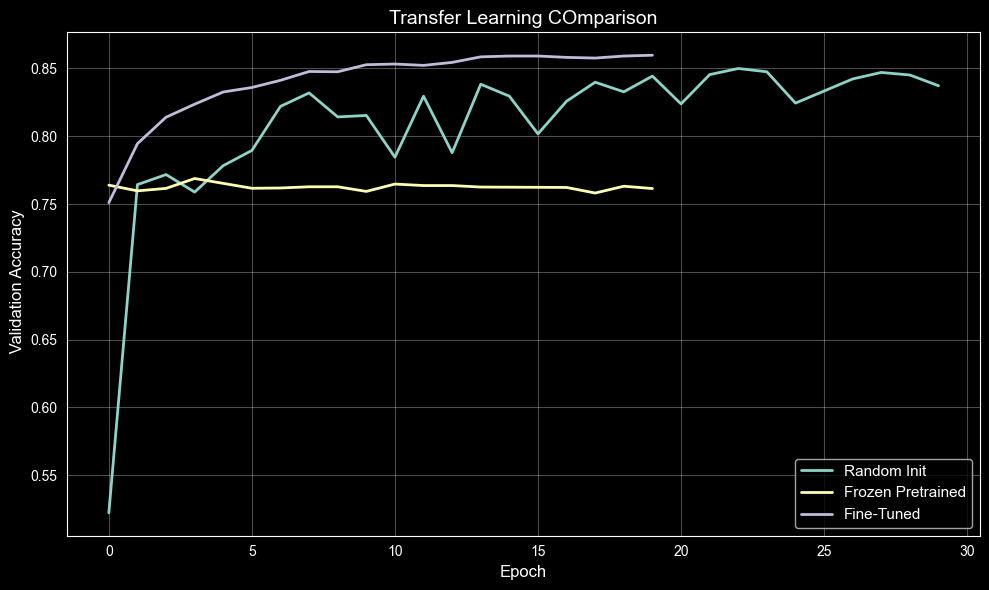

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(history_random["val_accuracy"], linewidth=2)
plt.plot(history_frozen["val_accuracy"], linewidth=2)
plt.plot(history_finetune["val_accuracy"], linewidth=2)

plt.title("Transfer Learning COmparison", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel(" Validation Accuracy", fontsize=12)
plt.legend(["Random Init", "Frozen Pretrained" ,"Fine-Tuned"], fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

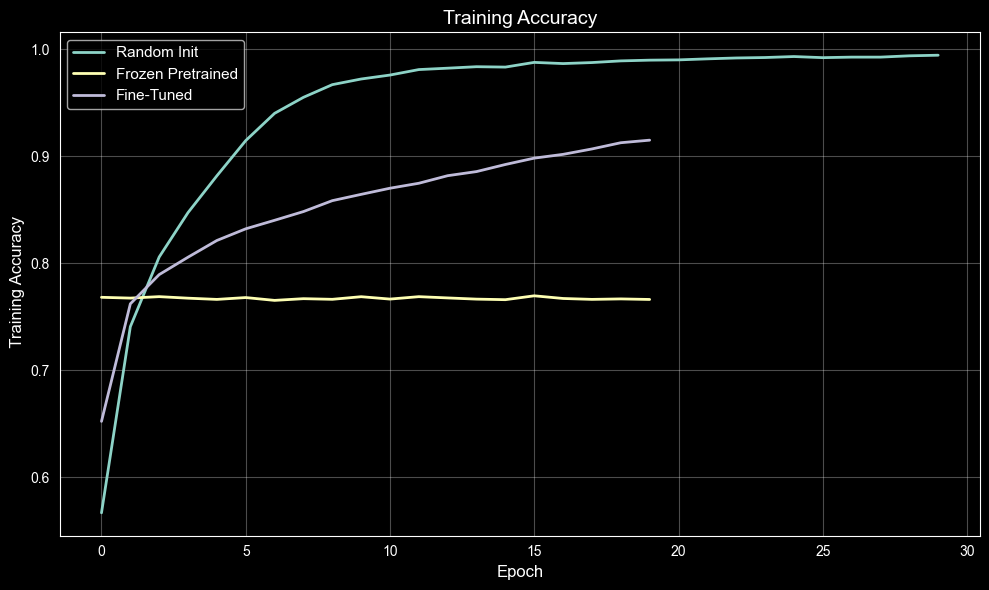

In [26]:
#Plotting Training Accuracy

plt.figure(figsize=(10,6))

plt.plot(history_random['accuracy'], linewidth=2)
plt.plot(history_frozen['accuracy'], linewidth=2)
plt.plot(history_finetune['accuracy'], linewidth=2)

plt.title("Training Accuracy", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel(" Training Accuracy", fontsize=12)
plt.legend(["Random Init","Frozen Pretrained", "Fine-Tuned"], fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()